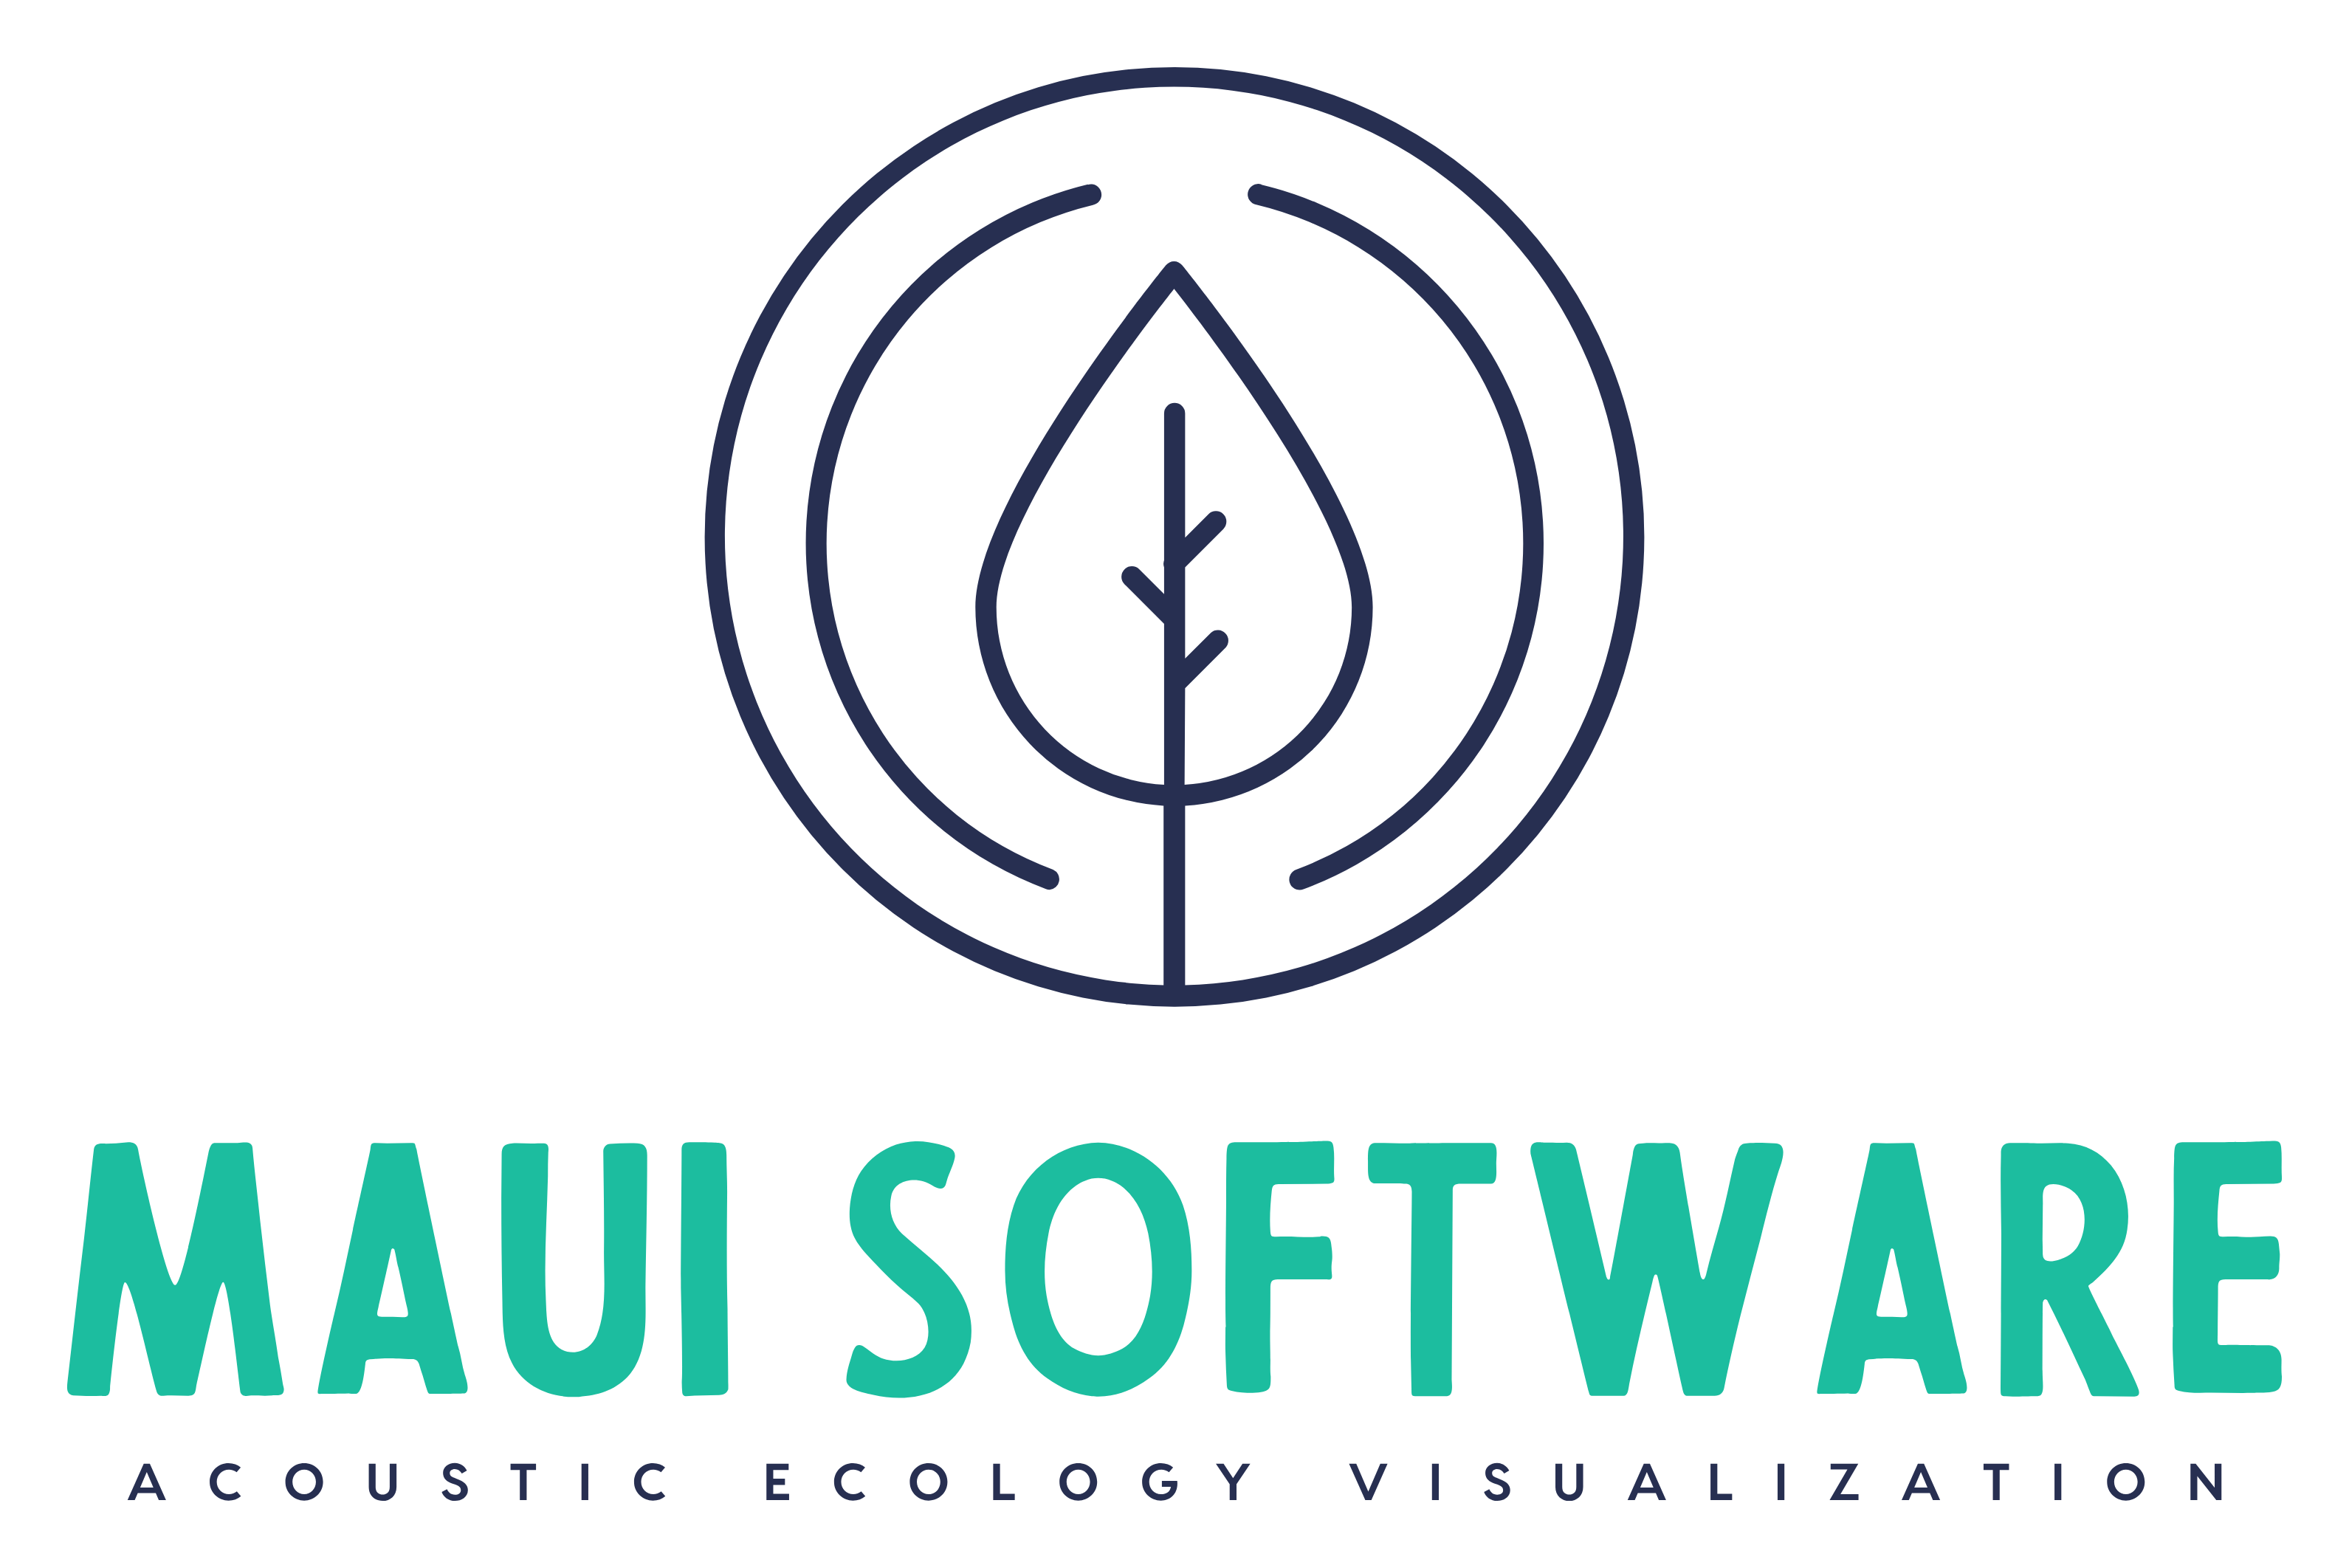

# Welcome to Maui!
## Examples series - Exploratory Data Analysis

In this example, you'll see how to perform Exploratory Data Analysis in the loaded data using the EDA module from Maui.

If you have any questions or encounter any issues, please let us know through the [project's GitHub discussions](https://github.com/maui-software/maui-software/discussions)!



# 1. Import Maui

## 1.1. Installation

Maui is available on PyPi and can be installed using pip with the following command. One important detail is that Maui is specifically designed for use in coding interfaces like Colab and Jupyter Lab due to its advanced visualization capabilities, leveraging the power of Plotly.



In [24]:
!pip install maui-software

## 1.2. Import

Once installed, it's time to import!

Maui consists of several submodules that need to be imported individually. For this tutorial, we are particularly interested in utilizing the Samples and EDA modules.

The samples module will be used to retrieve data from xeno-canto, and the EDA module will be used to perform exploratory data analysis over the metadata of the audios.

In [3]:
import audioread

from maui import samples, eda

# 2. Load dataset

The initial task is to load the data. In this example we will use the samples module to extract all audios from Brazil present in Xeno-Canto dataset. Note that Maui counts on an abstraction of Xeno-Canto API, which is simple to use.

The method downloads the data and returns a dataframe with all information necessary to create visualizations over the data, such as path to the audio file, date and time of the recording and other variables present in Xeno-Canto dataset.

We will the folowwing data from the dataset:

- **date**: the date of the recording (renamed to dt)
- **group**: the group to which the species belongs (birds, grasshoppers, bats)
- **stage**: the life stage of the animal (adult, juvenile, etc.)

We will also use the duration of the audios, which is calculated in this notebook.

A full description of each field of Xeno-Canto dataset is available at the [oficial website](https://xeno-canto.org/explore/api).

In [ ]:
params = {
    'cnt':'brazil'
}

df = samples.get_xc_data(q = params, extract_path="./xc_data")


In [5]:
unhashable_columns = df.columns[df.map(lambda x: isinstance(x, (list, dict))).any()]
df = df.drop(columns=unhashable_columns) # removing dictionary columns

df.rename(columns={'local_file_path': 'file_path', 'date': 'dt'}, inplace=True)

In [28]:
# Define a function to calculate duration
def get_duration(file_path):
    with audioread.audio_open(file_path) as audio_file:
        return audio_file.duration


# Apply the function to the DataFrame
df['duration'] = df['file_path'].apply(get_duration)

# 3. Exploratory data analysis
Once the data is loaded, we can conduct exploratory data analysis (EDA). This section aims to illustrate the usage of the methods in the EDA module.

## 3.1. Card Summary
This visualization is the starting point of our analysis. It shows an overview of the dataset regarding to recording days, total duration, mean duration, number of samples, and two categorial columns. For this example, we selected group and stage columns.

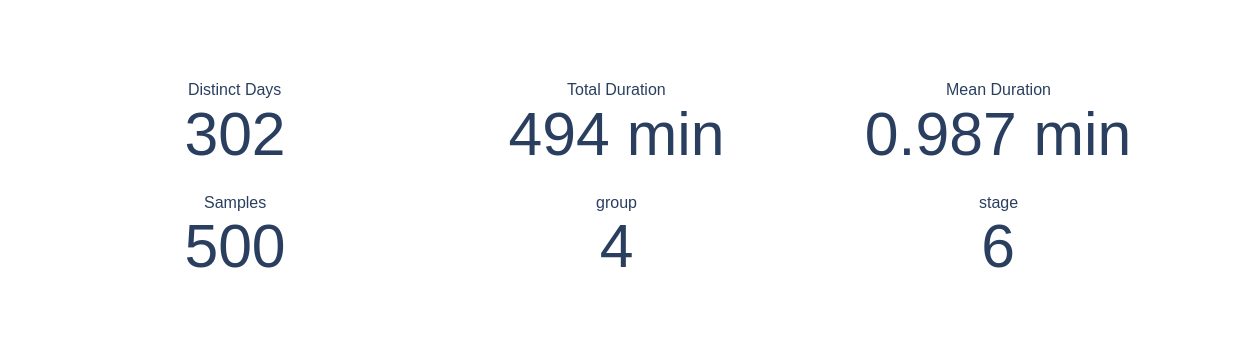

In [14]:
categories = ['group', 'stage']
card_dict, fig = eda.card_summary(df, categories)

## 3.2. Daily Distribution Analysis
This visualization presents a histogram based on the recording date and the life stage classification. It clearly shows a significant increase in the number of recordings from 2022 onwards. Another important point is that, before 2019, most recordings were not classified by life stage. Among those that were classified, the majority are labeled as adult stage.

We can also observe that most bird recordings were made before 2019 and were not labeled in terms of life stage.

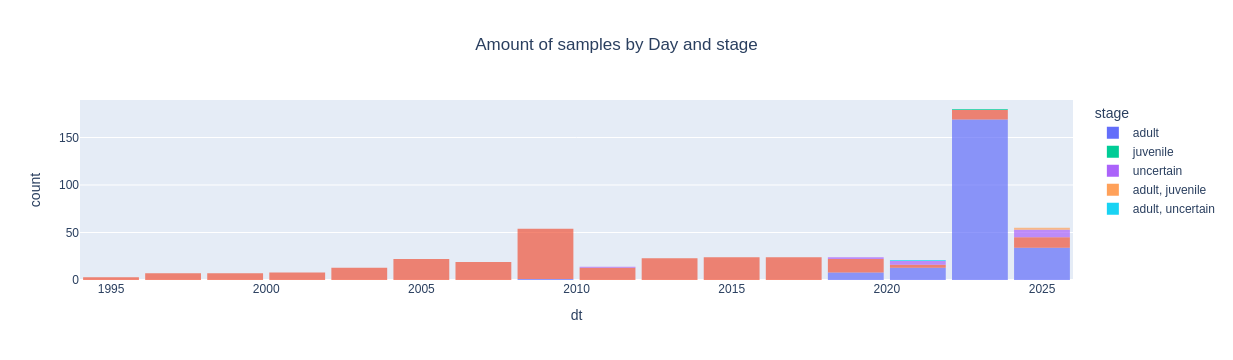

In [15]:
fig = eda.daily_distribution_analysis(df, 'dt', 'stage')

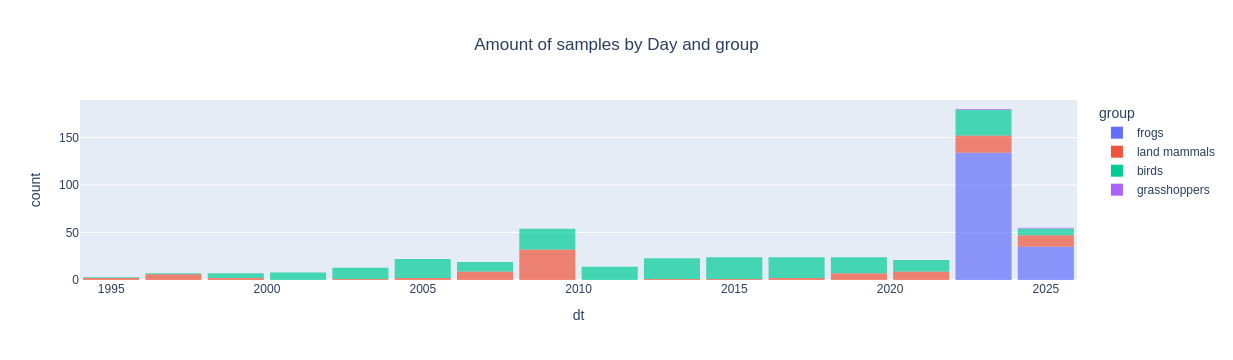

In [27]:
fig = eda.daily_distribution_analysis(df, 'dt', 'group')

## 3.3. Duration Analysis
Analyzing the duration of the audio recordings by group, we notice that frogs typically have longer recordings compared to the other groups. This may be due to the nature of frog calls, which tend to last longer than bird calls. Grasshoppers are represented by only one audio file, so their distribution is not significant.

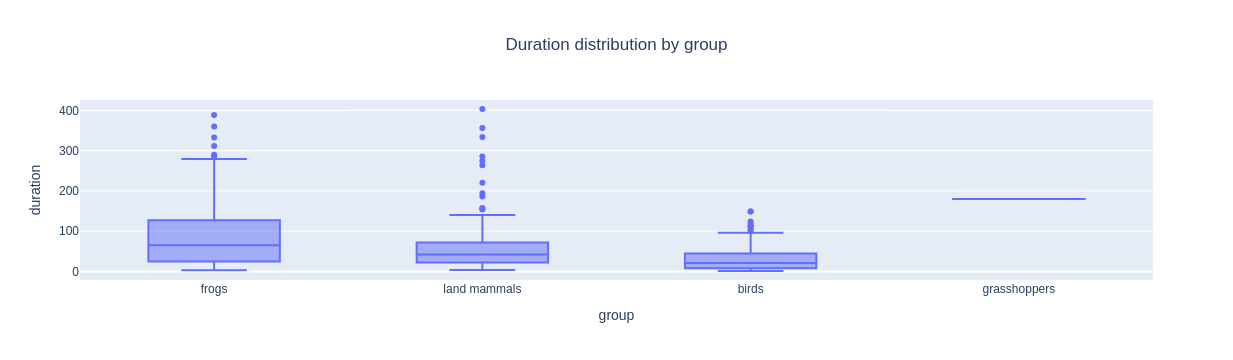

In [21]:
fig = eda.duration_analysis(df, 'group', 'duration')

## 3.4. Duration Distribution

Analyzing only the duration distribution, we observe that most recordings are shorter than one minute. This may indicate that the recordings are tailored to capture just enough of the animal sounds for identification purposes.

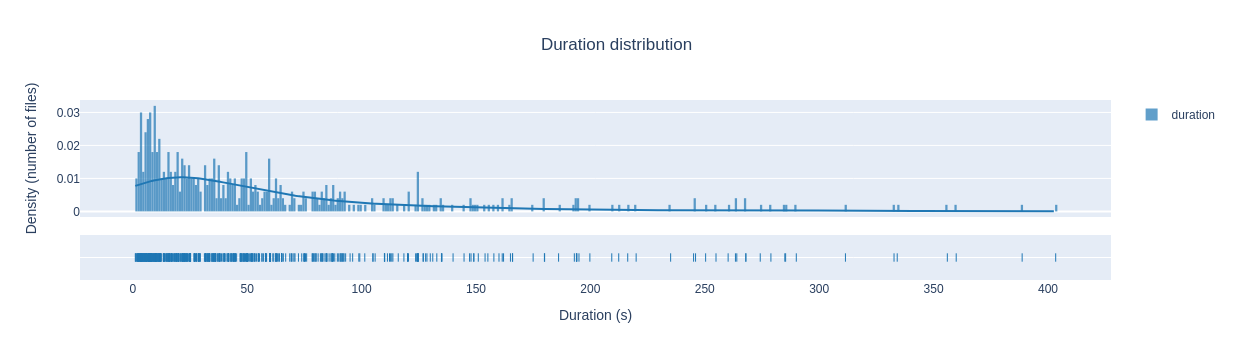

In [17]:
fig = eda.duration_distribution(df)

## 3.5. Heatmap Analysis
The heatmap shows that most recordings are labeled as adult, especially for birds and frogs. Other stages are underrepresented, and uncertain labels appear only in these two groups. Grasshoppers have very few recordings, while land mammals show more stage diversity despite fewer samples.

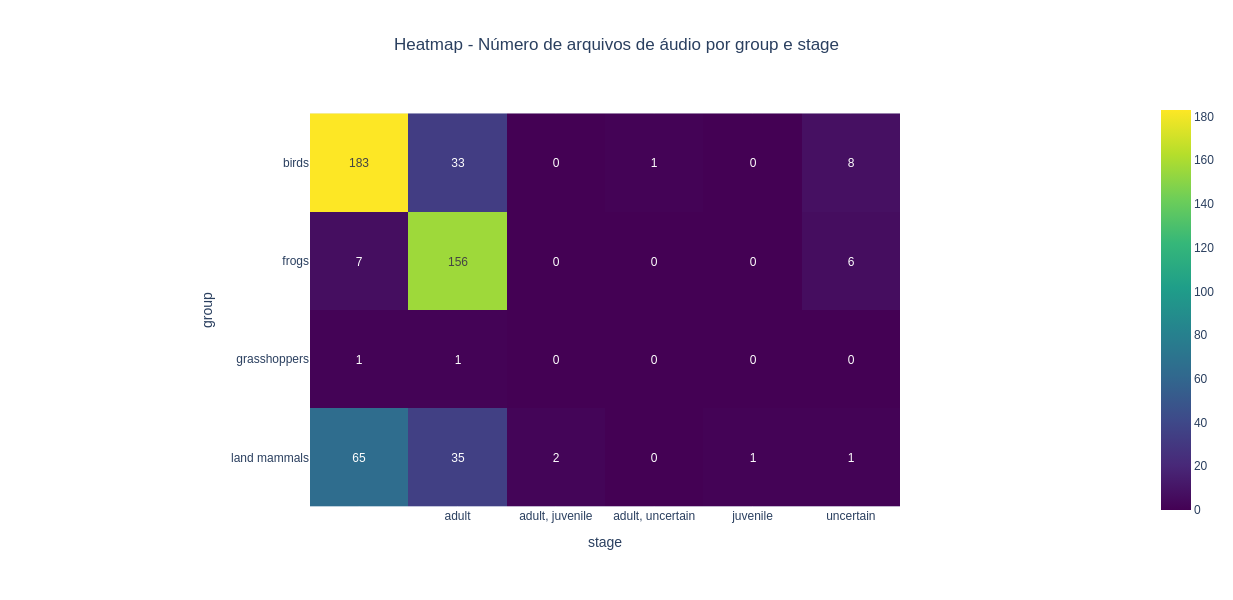

In [23]:
df_group, fig = eda.heatmap_analysis(df, 'group', 'stage')

## 3.6. Histogram Analysis
This bar plot shows the number of audio samples per group, segmented by stage. Frogs and birds have the highest number of recordings, with frogs predominantly classified as adult, and birds showing more diversity in stage classification, especially in juvenile and adult. Land mammals have fewer recordings but a more balanced distribution between adult and juvenile. Grasshoppers have almost no representation.

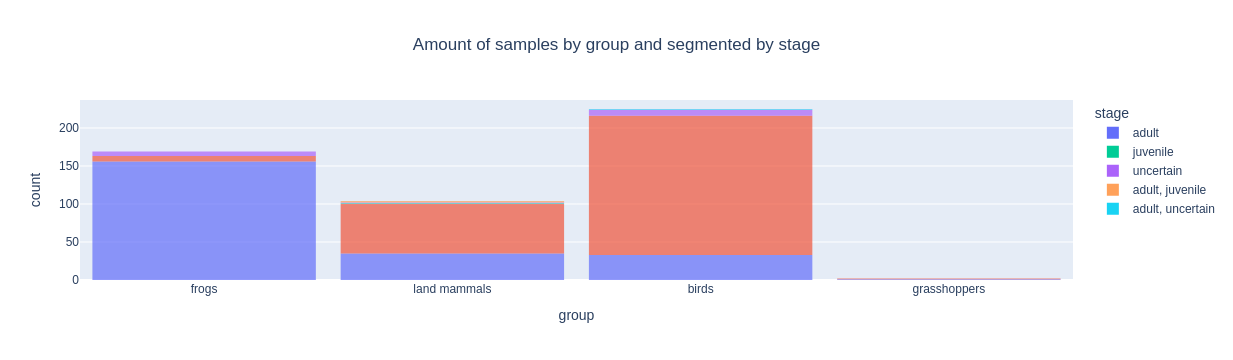

In [19]:
fig = eda.histogram_analysis(df, 'group', 'stage')